# Logistic Regression

This program can be used to find if the student is likely to get accepted by a college admissions commitee or not based on two taken exams. 

Useful: https://aimotion.blogspot.com/2011/11/machine-learning-with-python-logistic.html

In [25]:
import psycopg2
import numpy as np
from pylab import scatter, show, legend, xlabel, ylabel
import scipy.optimize as opt
conn = psycopg2.connect("dbname='postgres' user='***' host='localhost' password='***'")
cursor = conn.cursor()

In [27]:
cursor.execute("""SELECT exam1, exam2 from collegea""")
X = np.array(cursor.fetchall())
cursor.execute("""SELECT result from collegea""")
y = np.array(cursor.fetchall())
X = X.astype(np.float32)
y = y.astype(np.float32)
temp = np.zeros(len(y))
for i in np.arange(len(y)):
    temp[i] = y[i][0]
y = temp

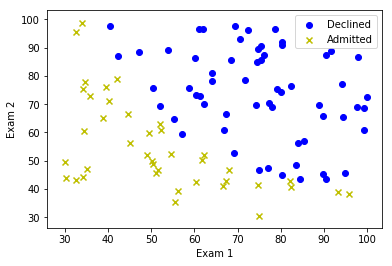

In [73]:
pos = np.where(y == 1)
neg = np.where(y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='y')
xlabel('Exam 1')
ylabel('Exam 2')
legend(['Declined', 'Admitted'])
show()

In [46]:
def sigmoid(X):
    return 1 / (1 + np.exp(- X))

def cost(theta, X, y):
    p_1 = sigmoid(np.dot(X, theta)) # predicted probability of label 1
    log_l = (-y)*np.log(p_1) - (1-y)*np.log(1-p_1) # log-likelihood vector

    return log_l.mean()

def grad(theta, X, y):
    p_1 = sigmoid(np.dot(X, theta))
    error = p_1 - y # difference between label and prediction
    grad = np.dot(error, X_1) / y.size # gradient vector

    return grad

def predict(theta, X):
    p_1 = sigmoid(np.dot(X, theta))
    return p_1 > 0.5

In [52]:
# prefix an extra column of ones to the feature matrix (for intercept term)
theta = 0.1* np.random.randn(3)
X_1 = np.append( np.ones((X.shape[0], 1)), X, axis=1)

theta_1 = opt.fmin_bfgs(cost, theta, fprime=grad, args=(X_1, y))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 27
         Function evaluations: 31
         Gradient evaluations: 31


In [60]:
p = predict(np.array(theta_1), X_1)
print ('Train Accuracy: %f' % ((y[np.where(p == y)].size / float(y.size)) * 100.0))

Train Accuracy: 89.000000


### Alternatively

In [64]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
fit = logistic.fit(X,y)
logistic.predict([[75,39]])

array([ 1.])